## 4.4 时间序列的生成和转换

In [3]:
from datetime import date, time, datetime, timedelta

### 4.4.1 用datetime生成时间序列

#### 示例 4.37

In [4]:
datetime_obj = datetime(2016, 10, 26, 10, 23, 15, 1)
print(f'datetime: {datetime_obj}')


datetime: 2016-10-26 10:23:15.000001


#### 示例4.38

In [9]:
re_datetime_obj = datetime_obj.replace(day=27, hour=20)
print(f'datetime: {re_datetime_obj}')
print(f'datetime.isoformat(): {datetime_obj.isoformat()}')
print(f'datetime.strftime(): {datetime_obj.strftime("%Y-%m-%d %X")}')

datetime: 2016-10-27 20:23:15.000001
datetime.isoformat(): 2016-10-26T10:23:15.000001
datetime.strftime(): 2016-10-26 10:23:15


#### 示例 4.39

In [14]:
print(f'datetime.strptime(): {datetime.strptime("2016-10-26", "%Y-%m-%d")}')
print(f'fromtimestamp(): {datetime.fromtimestamp(1429417200.0)}')
print(f'utcfromtimestamp(): {datetime.utcfromtimestamp(1429417200.0)}')
print(f'datetime.now(): {datetime.now()}')

datetime.strptime(): 2016-10-26 00:00:00
fromtimestamp(): 2015-04-19 12:20:00
utcfromtimestamp(): 2015-04-19 04:20:00
datetime.now(): 2021-02-14 19:19:58.573943


#### 示例 4.40

In [15]:
delta_obj = datetime.strptime("2019-10-18 04:20:00", "%Y-%m-%d %X")- datetime.strptime("2019-10-01 04:20:00", "%Y-%m-%d %X")
print(type(delta_obj), delta_obj)
print(delta_obj.days, delta_obj.total_seconds())

<class 'datetime.timedelta'> 17 days, 0:00:00
17 1468800.0


#### 示例 4.41

In [16]:
dt = datetime.now()
dt1 = dt + timedelta(days=1, hours=1)
dt2 = dt + timedelta(days=-1)
dt3 = dt - timedelta(days=1)
print(dt1)
print(dt2)
print(dt3)

2021-02-15 20:26:30.929519
2021-02-13 19:26:30.929519
2021-02-13 19:26:30.929519


### 4.4.2 用Pandas生成时间序列

In [19]:
import pandas as pd

#### 1. 基础元素 Timestamp

#### 示例 4.42

In [22]:
ts = pd.Timestamp(2019, 1, 1, 2, 3, 4)
print(f'pd.Timestamp()-1: {ts}')
ts = pd.Timestamp(datetime(2019, 1, 1, hour=2, minute=3, second=4))
print(f'pd.Timestamp()-2: {ts}')
ts = pd.Timestamp("2019-1-1 2:3:4")
print(f'pd.Timestamp()-3: {ts}')
print(f'pd.Timestamp()-type: {type(ts)}')

pd.Timestamp()-1: 2019-01-01 02:03:04
pd.Timestamp()-2: 2019-01-01 02:03:04
pd.Timestamp()-3: 2019-01-01 02:03:04
pd.Timestamp()-type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### 2. 时间偏移 Timedelta

#### 示例 4.45

In [23]:
dt_0 = pd.to_datetime(datetime(2019, 1, 1, hour=0, minute=0, second=0))
dt_1 = dt_0 + pd.Timedelta(days=5, minutes=50, seconds=20)
print(f'datetime-1:{dt_0}\ndatetime-2:{dt_1}')


datetime-1:2019-01-01 00:00:00
datetime-2:2019-01-06 00:50:20


#### 3.生成时间范围序列

#### 示例 4.46

In [24]:
date_rng = pd.date_range('2019-01-01', freq='M', periods=12)
print(f'month date_range():\n{date_rng}')

period_rng = pd.period_range('2019-01-01', freq='M', periods=12)
print(f'month period_range():\n{period_rng}')

month date_range():
DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='M')
month period_range():
PeriodIndex(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12'],
            dtype='period[M]', freq='M')


#### 4.4.3 时间序列的降采样

#### 示例 4.49

In [25]:
import numpy as np

In [26]:
rng = pd.date_range('20190101', freq='D', periods=12)
ts_d = pd.Series(np.arange(1, 13), index=rng)
print(ts_d)

2019-01-01     1
2019-01-02     2
2019-01-03     3
2019-01-04     4
2019-01-05     5
2019-01-06     6
2019-01-07     7
2019-01-08     8
2019-01-09     9
2019-01-10    10
2019-01-11    11
2019-01-12    12
Freq: D, dtype: int64


In [28]:
print(ts_d.resample('5D', closed='left', label='left').sum())
print(ts_d.resample('5D', closed='right', label='right').sum())

2019-01-01    15
2019-01-06    40
2019-01-11    23
Freq: 5D, dtype: int64
2019-01-01     1
2019-01-06    20
2019-01-11    45
2019-01-16    12
Freq: 5D, dtype: int64


#### 4.4.4 时间序列的升采样

#### 示例 4.50

In [30]:
ts_12h_asfred = ts_d.resample('12H').asfreq()
print(ts_12h_asfred)
ts_12h_ffill = ts_d.resample('12H').ffill()
print(ts_12h_ffill)
ts_12h_bfill = ts_d.resample('12H').bfill()
print(ts_12h_bfill)

2019-01-01 00:00:00     1.0
2019-01-01 12:00:00     NaN
2019-01-02 00:00:00     2.0
2019-01-02 12:00:00     NaN
2019-01-03 00:00:00     3.0
2019-01-03 12:00:00     NaN
2019-01-04 00:00:00     4.0
2019-01-04 12:00:00     NaN
2019-01-05 00:00:00     5.0
2019-01-05 12:00:00     NaN
2019-01-06 00:00:00     6.0
2019-01-06 12:00:00     NaN
2019-01-07 00:00:00     7.0
2019-01-07 12:00:00     NaN
2019-01-08 00:00:00     8.0
2019-01-08 12:00:00     NaN
2019-01-09 00:00:00     9.0
2019-01-09 12:00:00     NaN
2019-01-10 00:00:00    10.0
2019-01-10 12:00:00     NaN
2019-01-11 00:00:00    11.0
2019-01-11 12:00:00     NaN
2019-01-12 00:00:00    12.0
Freq: 12H, dtype: float64
2019-01-01 00:00:00     1
2019-01-01 12:00:00     1
2019-01-02 00:00:00     2
2019-01-02 12:00:00     2
2019-01-03 00:00:00     3
2019-01-03 12:00:00     3
2019-01-04 00:00:00     4
2019-01-04 12:00:00     4
2019-01-05 00:00:00     5
2019-01-05 12:00:00     5
2019-01-06 00:00:00     6
2019-01-06 12:00:00     6
2019-01-07 00:00:0

#### 示例 4.51

In [31]:
ts_offset_ffill = ts_d.resample('6H', loffset='9.5H').ffill(limit=1)
print(ts_offset_ffill)

2019-01-01 09:30:00     1.0
2019-01-01 15:30:00     1.0
2019-01-01 21:30:00     NaN
2019-01-02 03:30:00     NaN
2019-01-02 09:30:00     2.0
2019-01-02 15:30:00     2.0
2019-01-02 21:30:00     NaN
2019-01-03 03:30:00     NaN
2019-01-03 09:30:00     3.0
2019-01-03 15:30:00     3.0
2019-01-03 21:30:00     NaN
2019-01-04 03:30:00     NaN
2019-01-04 09:30:00     4.0
2019-01-04 15:30:00     4.0
2019-01-04 21:30:00     NaN
2019-01-05 03:30:00     NaN
2019-01-05 09:30:00     5.0
2019-01-05 15:30:00     5.0
2019-01-05 21:30:00     NaN
2019-01-06 03:30:00     NaN
2019-01-06 09:30:00     6.0
2019-01-06 15:30:00     6.0
2019-01-06 21:30:00     NaN
2019-01-07 03:30:00     NaN
2019-01-07 09:30:00     7.0
2019-01-07 15:30:00     7.0
2019-01-07 21:30:00     NaN
2019-01-08 03:30:00     NaN
2019-01-08 09:30:00     8.0
2019-01-08 15:30:00     8.0
2019-01-08 21:30:00     NaN
2019-01-09 03:30:00     NaN
2019-01-09 09:30:00     9.0
2019-01-09 15:30:00     9.0
2019-01-09 21:30:00     NaN
2019-01-10 03:30:00 

<ipython-input-31-fd47614918bd>:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts_offset_ffill = ts_d.resample('6H', loffset='9.5H').ffill(limit=1)


## 4.5 DataFrame的规整化处理

### 4.5.1 模拟生成股票行情数据

#### 1. 生成data参数

In [37]:
close_data = np.random.normal(loc=10.0, scale=1.0, size=1000)
print(f'close_date:\n {format(close_data[0:10])}')
print(f'close_data[999]:\n {format(close_data[999])}')

close_date:
 [10.97793879 10.14256162 10.33566743 10.14317636 10.78481633 10.60717612
  9.39657149  9.82353664  9.93069536  8.49934302]
close_data[999]:
 10.523829271591797


In [38]:
open_data = np.roll(close_data, 1)
print(f"open_data:\n {format(open_data[0:10])}")

open_data:
 [10.52382927 10.97793879 10.14256162 10.33566743 10.14317636 10.78481633
 10.60717612  9.39657149  9.82353664  9.93069536]


In [39]:
high_data = np.where((open_data > close_data), open_data, close_data)
print(f'high_data:\n {format(high_data[0:10])}')

low_data = np.where((open_data <= close_data), open_data, close_data)
print(f'low_data:\n {format(low_data[0:10])}')

high_data:
 [10.97793879 10.97793879 10.33566743 10.33566743 10.78481633 10.78481633
 10.60717612  9.82353664  9.93069536  9.93069536]
low_data:
 [10.52382927 10.14256162 10.14256162 10.14317636 10.14317636 10.60717612
  9.39657149  9.39657149  9.82353664  8.49934302]


In [40]:
open_data[0] = np.nan
close_data[0] = np.nan
high_data[0] = np.nan
low_data[0] = np.nan

#### 2. 生成index参数

In [42]:
date_index = pd.date_range('2010-01-01', freq='D', periods=1000)
print(f'生成日时间序列：\n{date_index}')


生成日时间序列：
DatetimeIndex(['2010-01-01', '2010-01-02', '2010-01-03', '2010-01-04',
               '2010-01-05', '2010-01-06', '2010-01-07', '2010-01-08',
               '2010-01-09', '2010-01-10',
               ...
               '2012-09-17', '2012-09-18', '2012-09-19', '2012-09-20',
               '2012-09-21', '2012-09-22', '2012-09-23', '2012-09-24',
               '2012-09-25', '2012-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')


#### 3. 生成columns参数

#### 4. 创建DataFrame数据

In [45]:
df_stock = pd.DataFrame({'close':close_data, 'open':open_data, 'high':high_data, 'low':low_data}, index=date_index)
print(f'股价行情数据:\n {df_stock.head()}')


股价行情数据:
                 close       open       high        low
2010-01-01        NaN        NaN        NaN        NaN
2010-01-02  10.142562  10.977939  10.977939  10.142562
2010-01-03  10.335667  10.142562  10.335667  10.142562
2010-01-04  10.143176  10.335667  10.335667  10.143176
2010-01-05  10.784816  10.143176  10.784816  10.143176


In [67]:
volume_data = np.random.randint(100000, 200000, 1000)
df_volume = pd.DataFrame({'volume': volume_data}, index=date_index)
print(f'成交量数据:\n {df_volume.head()}')

成交量数据:
             volume
2010-01-01  119893
2010-01-02  136141
2010-01-03  138795
2010-01-04  140840
2010-01-05  145148


### 4.5.2 DataFrame概览

#### 示例 4.5.2-4.56

In [68]:
df_stock.head()

,close,open,high,low
2010-01-02,10.14,10.98,10.98,10.14
2010-01-03,10.34,10.14,10.34,10.14
2010-01-04,10.14,10.34,10.34,10.14
2010-01-05,10.78,10.14,10.78,10.14
2010-01-06,10.61,10.78,10.78,10.61


In [69]:
df_stock.tail()

,close,open,high,low
2012-09-22,9.89,9.36,9.89,9.36
2012-09-23,9.65,9.89,9.89,9.65
2012-09-24,10.43,9.65,10.43,9.65
2012-09-25,10.71,10.43,10.71,10.43
2012-09-26,10.52,10.71,10.71,10.52


In [70]:
df_stock.shape

(999, 4)

In [71]:
df_stock.columns

Index(['close', 'open', 'high', 'low'], dtype='object')

In [72]:
df_stock.index

DatetimeIndex(['2010-01-02', '2010-01-03', '2010-01-04', '2010-01-05',
               '2010-01-06', '2010-01-07', '2010-01-08', '2010-01-09',
               '2010-01-10', '2010-01-11',
               ...
               '2012-09-17', '2012-09-18', '2012-09-19', '2012-09-20',
               '2012-09-21', '2012-09-22', '2012-09-23', '2012-09-24',
               '2012-09-25', '2012-09-26'],
              dtype='datetime64[ns]', length=999, freq='D')

In [73]:
df_stock.describe()

,close,open,high,low
count,999.000000,999.000000,999.000000,999.000000
mean,9.962593,9.963053,10.511441,9.414204
std,0.981108,0.981477,0.803471,0.823247
min,6.910000,6.910000,8.140000,6.910000
25%,9.290000,9.290000,9.950000,8.870000
50%,9.990000,9.990000,10.470000,9.410000
75%,10.600000,10.600000,11.010000,10.010000
max,13.060000,13.060000,13.060000,12.110000


In [74]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2010-01-02 to 2012-09-26
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   999 non-null    float64
 1   open    999 non-null    float64
 2   high    999 non-null    float64
 3   low     999 non-null    float64
dtypes: float64(4)
memory usage: 39.0 KB


### 4.5.3 DataFrame的可视化

In [75]:
import matplotlib.pyplot as plt

#### 示例4.57

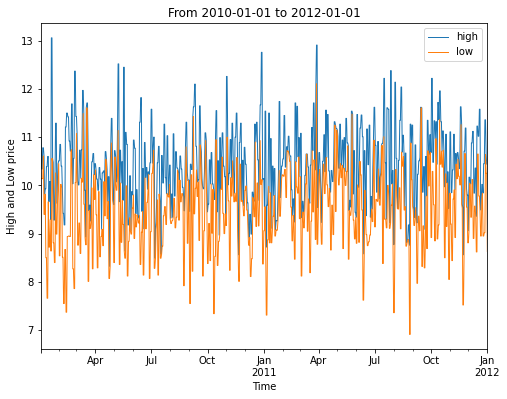

In [76]:
df_visual = df_stock.loc['2010-01-01':'2012-01-01', ['high', 'low']].plot(linewidth=1, figsize=(8, 6))
df_visual.set_xlabel('Time')
df_visual.set_ylabel('High and Low price')
df_visual.set_title('From 2010-01-01 to 2012-01-01')
df_visual.legend()
plt.show()

### 4.5.4 DataFrame缺失值处理

#### 1. 定位缺失值

#### 示例 4.58

In [77]:
print(df_stock.isnull().head())

            close   open   high    low
2010-01-02  False  False  False  False
2010-01-03  False  False  False  False
2010-01-04  False  False  False  False
2010-01-05  False  False  False  False
2010-01-06  False  False  False  False


In [78]:
print(df_stock.notnull().head())

            close  open  high   low
2010-01-02   True  True  True  True
2010-01-03   True  True  True  True
2010-01-04   True  True  True  True
2010-01-05   True  True  True  True
2010-01-06   True  True  True  True


#### 示例 4.59

In [79]:
print(df_stock[df_stock.isnull().T.any().T])

Empty DataFrame
Columns: [close, open, high, low]
Index: []


#### 2. 填充缺失值

#### 示例 4.60

In [80]:
df_fillna = df_stock.fillna(method='bfill', axis=0)
print(df_fillna.head())

            close   open   high    low
2010-01-02  10.14  10.98  10.98  10.14
2010-01-03  10.34  10.14  10.34  10.14
2010-01-04  10.14  10.34  10.34  10.14
2010-01-05  10.78  10.14  10.78  10.14
2010-01-06  10.61  10.78  10.78  10.61


#### 示例 4.61

In [81]:
df_stock.dropna(axis=0, how='any', inplace=True)
print(df_stock[df_stock.isnull().T.any().T])

Empty DataFrame
Columns: [close, open, high, low]
Index: []


### 4.5.5 DataFrame精度的转换

#### 示例 4.62

In [82]:
df_stock = df_stock.round(2)
print(df_stock.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 999 entries, 2010-01-02 to 2012-09-26
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   999 non-null    float64
 1   open    999 non-null    float64
 2   high    999 non-null    float64
 3   low     999 non-null    float64
dtypes: float64(4)
memory usage: 39.0 KB
None


#### 1. concat()合并DataFrame

#### 示例 4.63

In [83]:
df_concat = pd.concat([df_stock, df_volume], axis=1, join='inner')
print(df_concat.head())

            close   open   high    low  volume
2010-01-02  10.14  10.98  10.98  10.14  136141
2010-01-03  10.34  10.14  10.34  10.14  138795
2010-01-04  10.14  10.34  10.34  10.14  140840
2010-01-05  10.78  10.14  10.78  10.14  145148
2010-01-06  10.61  10.78  10.78  10.61  157212


#### 示例 4.64

In [84]:
df_merge = pd.merge(df_stock, df_volume, left_index=True, right_index=True, how='inner')
print(df_merge.head())

            close   open   high    low  volume
2010-01-02  10.14  10.98  10.98  10.14  136141
2010-01-03  10.34  10.14  10.34  10.14  138795
2010-01-04  10.14  10.34  10.34  10.14  140840
2010-01-05  10.78  10.14  10.78  10.14  145148
2010-01-06  10.61  10.78  10.78  10.61  157212


#### 示例 4.65

In [85]:
df_join = df_stock.join(df_volume, how='inner')
print(df_join.head())

            close   open   high    low  volume
2010-01-02  10.14  10.98  10.98  10.14  136141
2010-01-03  10.34  10.14  10.34  10.14  138795
2010-01-04  10.14  10.34  10.34  10.14  140840
2010-01-05  10.78  10.14  10.78  10.14  145148
2010-01-06  10.61  10.78  10.78  10.61  157212


## 4.6 DataFrame的高效遍历

### 4.6.1 循环遍历的几种方式

#### 1. for-in循环


#### 2. iterrows()生成器

#### 3. DataFrame.apply()

#### 4. 矢量化方式

In [90]:
df_concat['pct_change'] = (df_concat['high'].values - df_concat['low'].values) / df_concat['open'].values
print(df_concat)

            close   open   high    low  volume  pct_change
2010-01-02  10.14  10.98  10.98  10.14  136141    0.076503
2010-01-03  10.34  10.14  10.34  10.14  138795    0.019724
2010-01-04  10.14  10.34  10.34  10.14  140840    0.019342
2010-01-05  10.78  10.14  10.78  10.14  145148    0.063116
2010-01-06  10.61  10.78  10.78  10.61  157212    0.015770
...           ...    ...    ...    ...     ...         ...
2012-09-22   9.89   9.36   9.89   9.36  194359    0.056624
2012-09-23   9.65   9.89   9.89   9.65  165259    0.024267
2012-09-24  10.43   9.65  10.43   9.65  142490    0.080829
2012-09-25  10.71  10.43  10.71  10.43  130246    0.026846
2012-09-26  10.52  10.71  10.71  10.52  104310    0.017740

[999 rows x 6 columns]


### 4.6.2 循环遍历的性能对比

## 4.7 DataFrame的存储和加载

### 4.7.1 将DataFrame存储至CSV 

#### 示例 4.66


In [91]:
df_concat.to_csv('table-stock.csv', columns=df_concat.columns, index=True)

### 4.7.2 将CSV加载为DataFrame

In [94]:
df_csvload = pd.read_csv('table-stock.csv', parse_dates=True, index_col=0, encoding='gb2312')
print(f'加载csv数据：\n {df_csvload.head()}')

加载csv数据：
             close   open   high    low  volume  pct_change
2010-01-02  10.14  10.98  10.98  10.14  136141    0.076503
2010-01-03  10.34  10.14  10.34  10.14  138795    0.019724
2010-01-04  10.14  10.34  10.34  10.14  140840    0.019342
2010-01-05  10.78  10.14  10.78  10.14  145148    0.063116
2010-01-06  10.61  10.78  10.78  10.61  157212    0.015770
